In [1]:
from transformers import VivitForVideoClassification, VivitImageProcessor
import torch

# Video pre loader
model_video = VivitForVideoClassification.from_pretrained("google/vivit-b-16x2-kinetics400")
processor_video = VivitImageProcessor.from_pretrained("google/vivit-b-16x2-kinetics400")

In [2]:
video = torch.randint(low=0, high=256, size=(32, 3, 224, 224))
video = processor_video(list(video), return_tensors="pt")

In [3]:
video.keys()

dict_keys(['pixel_values'])

In [4]:
patched_video = model_video(**video).logits.squeeze(0)

In [5]:
patched_video.shape

torch.Size([400])

In [1]:
from models.VATE import ContrastiveModel

model = ContrastiveModel(hidden_channels=200, out_channels=100)
model.load_state_dict(torch.load("../../dependencies/VATE/best_model_contrastive.pt"))
model.eval()

NameError: name 'torch' is not defined

In [7]:
res = model(x_video=patched_video.unsqueeze(0), x_audio=None, x_text=None)

In [9]:
res[0].shape

torch.Size([1, 100])

## Torch like Transforms

In [1]:
from torchvision.transforms import v2
from models.VATE.dataset import CallViViTModelAndProcessor, FrameResamplingNaive, default_AMIGOS
from common.data.custom import CustomVideoTransforms
from common.data.transform import Compose, IDENTITY


def video_transform(fps_map: tuple[int, int] = (30, 30), size: tuple[int, int] = (224, 224)) -> Compose:
    return Compose([
        v2.Resize((size[0] + int(.145 * size[0]), size[1] + int(.145 * size[1]))),
    ], [], [
        CustomVideoTransforms.ResampleVideoTensor(fps_map) if fps_map[0] != fps_map[1] else IDENTITY,
        FrameResamplingNaive(),
        CallViViTModelAndProcessor()
    ])

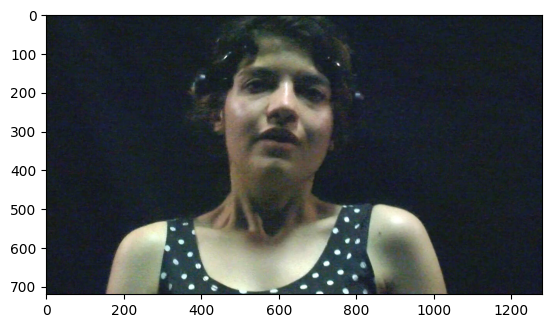

In [5]:
from common.data.video import extract_frames
import cv2
from matplotlib import pyplot as plt

path = "../../resources/AMIGOS/sampled/P01_9/1.mp4"

frames = extract_frames(cv2.VideoCapture(path))

plt.imshow(frames[0])
plt.show()

In [6]:
transform = video_transform()
transform(frames)

tensor([ 1.1083e+00, -4.2872e-01,  4.0363e+00, -3.9481e-01,  4.7402e+00,
         3.9217e-01, -2.4295e+00, -9.8989e-02, -1.4350e+00, -3.7673e+00,
        -4.0241e-01, -1.5822e+00, -1.0158e+00,  1.7478e+00, -2.3955e-01,
        -2.4115e+00,  3.9523e-01, -5.3844e-01, -1.6620e-01, -1.3949e+00,
         1.7601e+00, -2.9455e+00, -2.7324e+00, -1.7400e+00, -1.7756e+00,
        -2.1078e+00,  1.8418e+00, -1.7794e+00, -1.0567e-01,  1.0388e+00,
         9.9302e-01,  7.6929e-01,  1.9626e+00, -6.0676e-01, -3.3135e+00,
        -1.7802e-02,  3.3226e+00,  3.1123e+00, -2.2620e+00, -7.0353e-01,
        -2.7259e-01, -6.5555e-01,  1.8899e+00, -2.2906e+00,  3.0172e+00,
        -3.9976e-01, -2.6561e+00,  7.0271e-01, -2.4272e+00, -4.4898e-01,
         1.4657e-01, -7.4597e-01, -1.9374e+00, -5.6237e+00, -8.7767e-01,
         3.6310e-01,  5.5630e-01,  1.1189e-01, -4.4977e-01,  1.4392e+00,
        -1.4997e+00, -9.7995e-01, -1.5378e+00, -1.7787e+00,  1.8795e+00,
        -1.1594e+00, -6.3676e-01, -3.1606e+00, -2.1

## TODO GUARDA: VATE/feature_extraction/write_video.py
Crop del volto potrebbe non essere male come per VATE
> Ma sai che frose no, a guardare la nostra "ragazza" (P1) il linguaggio del corpo non sembra da ignorare

In [1]:
from models.VATE.dataset import  default_AMIGOS
amigos = default_AMIGOS("../../resources/AMIGOS/sampled/AMIGOS_sampled.csv")
res = amigos[0]
res

DatasetRecord(eeg=array([[ 7.41308747e-06,  6.88479417e-06, -8.92438380e-06, ...,
         2.84488150e+01,  3.01130028e+01,  2.45135586e+05],
       [-8.20086635e+00, -1.72213718e+00, -4.41759218e+00, ...,
         4.09218466e+01,  4.03527078e+01,  2.43870421e+05],
       [-1.24682588e+00,  4.38326942e-01, -8.03069327e+00, ...,
         3.53845509e+01,  3.32310638e+01,  2.57870975e+05],
       ...,
       [-6.67576842e+01, -8.68821303e+01,  5.76401037e+00, ...,
        -5.24433059e+00,  8.94641736e+00,  4.91290226e+05],
       [-1.95056581e+01, -8.15711752e+01,  1.26862598e+01, ...,
        -7.07114016e+00,  8.47320583e+00,  4.90391296e+05],
       [ 2.97020397e+01, -6.44776618e+01,  2.51408854e+01, ...,
        -5.32959518e+00,  8.11884552e+00,  4.90514089e+05]],
      shape=(640, 17)), video=tensor([ 0.5850, -0.2311,  4.3726,  1.4315,  6.7915,  1.1811, -2.2704, -0.3120,
        -0.8285, -3.7992,  0.6772, -0.7525,  0.5472,  2.7056, -0.5556, -2.9325,
         1.1445, -0.2799,  0.3125, 

In [2]:
amigos[1]

DatasetRecord(eeg=array([[ 1.04982776e+02, -4.89197609e+01,  3.69798052e+01, ...,
        -1.65575897e+00,  1.01620121e+01,  4.90232406e+05],
       [ 1.73970638e+02, -3.54686505e+01,  3.99303824e+01, ...,
        -2.92708076e+00,  9.41248813e+00,  4.89484199e+05],
       [ 1.96973851e+02, -5.86797510e+00,  3.73683313e+01, ...,
        -7.18792216e+00,  8.09478512e+00,  4.89103188e+05],
       ...,
       [-2.75795106e+00, -2.03453918e-01, -2.33882130e+00, ...,
        -6.66584845e+01,  1.53786867e+01,  4.46747040e+05],
       [-2.47611576e+01,  1.30206449e+00,  4.21871760e+00, ...,
        -7.55488038e+01,  2.03511759e+01,  4.46828370e+05],
       [-1.62709895e+01, -2.59171429e+00,  2.31592476e+00, ...,
        -8.84989302e+01,  2.40974243e+01,  4.46347616e+05]],
      shape=(640, 17)), video=tensor([ 0.3421, -0.6644,  4.7971,  1.2755,  6.4108,  0.3647, -2.4077, -0.1072,
        -0.7537, -3.1526,  0.4112, -0.2708, -0.1739,  2.5141, -0.2894, -2.4967,
         0.4441, -0.2692,  0.7115, 

In [ ]:
from torch import nn
from common.data.amigos.transform import train_eeg_transform
from common.data.amigos.transform import train_video_transform
from common.data.amigos.transform import train_audio_transform
from common.data.data_point import EEGDatasetTransformWrapper
from common.data.amigos.dataset import KDAmigosDataset
from models.VATE.dataset import vate_transform

dataset = KDAmigosDataset(
    dataset_spec_file="../../../resources/AMIGOS/processed/spec.csv",
    shared_transform=EEGDatasetTransformWrapper(
        train_eeg_transform(),
        train_video_transform(),
        train_audio_transform(),
    ),
    modality_transforms=[
        EEGDatasetTransformWrapper(
            vid_transform=nn.Sequential(
                v2.Resize((128, 128))
            ),
        ),
        vate_transform
    ]
)
